Importing required libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import pandas as pd
df2 = pd.read_csv('/content/sample_data/Group_7_Data_clean_woscale.csv')

In [6]:
df2.head()

,Unnamed: 0,age,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success,y
0,0,56,0,0,6,1,261,1,0,1.1,...,0,0,0,0,0,0,0,1,0,0
1,1,57,0,0,6,1,149,1,0,1.1,...,0,0,0,1,0,0,0,1,0,0
2,2,37,1,0,6,1,226,1,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,3,40,0,0,6,1,151,1,0,1.1,...,0,1,0,0,0,0,0,1,0,0
4,4,56,0,1,6,1,307,1,0,1.1,...,0,0,0,1,0,0,0,1,0,0


In [7]:
df2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
# Compute correlation matrix
correlation_matrix = df2.corr()
# Get correlations with the target variable
target_correlations = correlation_matrix['y'].abs().sort_values(ascending=False)

In [9]:
threshold = 0.15
selected_features = target_correlations[target_correlations >= threshold].index.tolist()
selected_features

['y',
 'duration',
 'nr.employed',
 'euribor3m',
 'emp.var.rate',
 'poutcome_nonexistent',
 'job_blue-collar',
 'marital_married',
 'education_basic.9y',
 'cons.price.idx',
 'campaign',
 'loan',
 'education_high.school',
 'housing',
 'job_technician',
 'poutcome_success',
 'job_services',
 'previous',
 'education_professional.course']

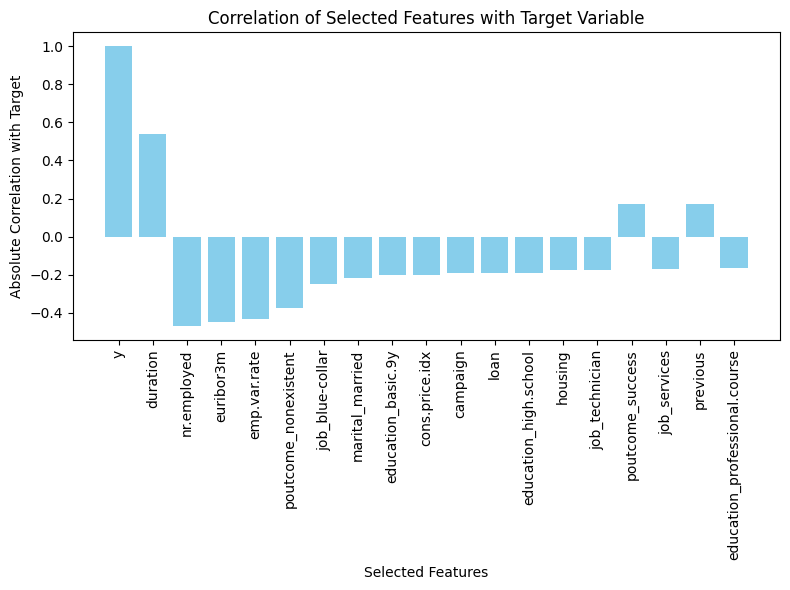

In [10]:
selected_corr_values = [correlation_matrix.loc['y', feature] for feature in selected_features]
# Plotting the correlations of selected features with the target variable
plt.figure(figsize=(8, 6))
plt.bar(selected_features, selected_corr_values, color='skyblue')
plt.xlabel('Selected Features')
plt.ylabel('Absolute Correlation with Target')
plt.title('Correlation of Selected Features with Target Variable')
plt.xticks(rotation=90)
plt.tight_layout()

In [11]:
X = df2[selected_features].values

In [12]:
y = df2['y']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X = df2.drop('y', axis=1)
y = df2['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[0.0024373  0.05404827 0.08019227 0.02137994 0.00839317 0.00113429
 0.00499063 0.04900048 0.10394014 0.00235543 0.00130325 0.12348253
 0.00243711 0.22900296 0.18145374 0.22307839 0.16608701 0.04126507
 0.16891923 0.16871865 0.05385538 0.13832007 0.13101115 0.10400419
 0.11322859 0.19485429 0.21371472 0.26399438 0.         0.23436688
 0.20678601 0.08611962 0.10194052]


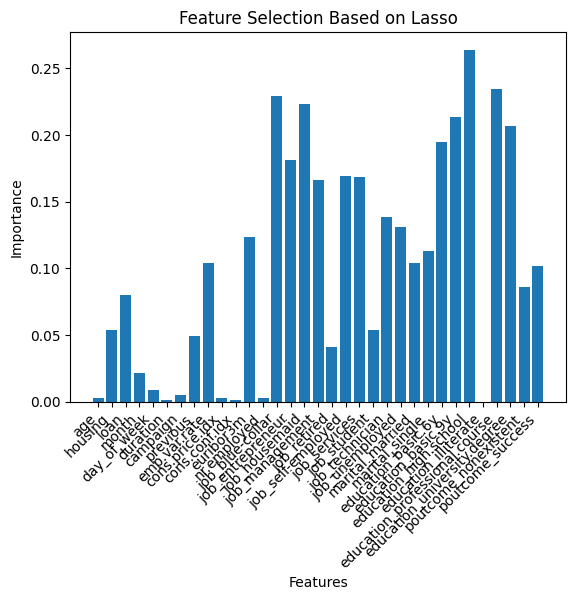

Index(['housing', 'loan', 'month', 'previous', 'emp.var.rate', 'euribor3m',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [16]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X, y)

# Estimate the lasso coefficients and make all to positive for better representation
lasso_coef = np.abs(lasso_model.coef_)
print(lasso_coef)

# Select features with non-zero coefficients
selected_features = X_train.columns[lasso_coef>= 0.01]

# plotting the Column Names and Importance of Columns.
plt.bar(X_train.columns, lasso_coef)
#plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
selected_features


*  Feature Selection is crucial role in improving the prediction of model training.

**Correlation**

*  Correlation shows the how the variable is related to the output and also easy to implement.
*   It is mainly used in indivdual feature vs target variable.
*   It is useful in linear relationship between the variable. It doesnot handle non linear associations.

**Lasso**
*  Lasso adds the penalty term during cost reduction and the value is shrink to zero, it will help to feature reduction.
*   lasso will help in linear and non linear association between variables.
*   And Also It will help to overfitting case.














In [17]:
data=df2[selected_features]
data
data1=df2['y']
data_new=pd.concat([data,data1],axis=1)

In [18]:
data_new.to_csv('/content/sample_data/df_fs.csv')

Read the csv file

In [19]:
import pandas as pd
df = pd.read_csv('/content/sample_data/df_fs.csv')

In [20]:
df

,Unnamed: 0,housing,loan,month,previous,emp.var.rate,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,...,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success,y
0,0,0,0,6,0,1.1,4.857000,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,6,0,1.1,4.857000,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,2,1,0,6,0,1.1,4.857000,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,3,0,0,6,0,1.1,4.857000,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,4,0,1,6,0,1.1,4.857000,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73069,73069,1,0,6,0,1.1,4.858231,0,0,0,...,0,0,0,0,0,0,1,1,0,1
73070,73070,0,0,8,0,-3.4,0.742417,0,0,0,...,1,0,0,0,0,0,0,0,0,1
73071,73071,0,0,3,0,1.4,4.963000,0,0,0,...,1,0,0,0,0,0,0,1,0,1
73072,73072,0,0,3,0,1.4,4.960480,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [21]:
df.columns

Index(['Unnamed: 0', 'housing', 'loan', 'month', 'previous', 'emp.var.rate',
       'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'poutcome_nonexistent',
       'poutcome_success', 'y'],
      dtype='object')

In [22]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [23]:
df

,housing,loan,month,previous,emp.var.rate,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success,y
0,0,0,6,0,1.1,4.857000,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,6,0,1.1,4.857000,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,1,0,6,0,1.1,4.857000,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,6,0,1.1,4.857000,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0,1,6,0,1.1,4.857000,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73069,1,0,6,0,1.1,4.858231,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
73070,0,0,8,0,-3.4,0.742417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
73071,0,0,3,0,1.4,4.963000,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
73072,0,0,3,0,1.4,4.960480,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [24]:
df.shape

(73074, 26)

In [25]:
X = df.drop('y', axis=1)  # Features
y = df['y']

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model_rf_fs = RandomForestClassifier()
RF_fs = model_rf_fs.fit(X1_train, y1_train)


Rf_pred = RF_fs.predict(X1_test)

# Evaluate the model after Randomized Search
accuracy_Rf_fs = accuracy_score(y1_test, Rf_pred)
print(f'Random Forest Accuracy before Randomized Search: {accuracy_Rf_fs:.4f}')

Random Forest Accuracy before Randomized Search: 0.8887


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

model3 = RandomForestClassifier()

grid_search = GridSearchCV(model3, param_grid, cv=5, verbose=2)

grid_search.fit(X1_train, y1_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

accuracy_RF_fs_HT = best_estimator.score(X1_test, y1_test)
print(f"Best Parameters: {best_params}")
print(f"Best Model's Accuracy: {accuracy_RF_fs_HT}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  11.2s
[CV] END max_depth=None, min_s

Including many features gives the model considerable flexibility.
That flexibility puts us at risk of overfitting and achieving pitiful generalizability that keeps models from making useful predictions on new data (when we’re truly interested in the predictions).
Therefore, reduce the feature count to reduce the overfitting potential.


In [29]:
model6=DecisionTreeClassifier()

In [30]:
model6.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [31]:
y_pred6 = model6.predict(X1_test)
accuracy_Dt_fs = accuracy_score(y1_test, y_pred6)
accuracy_Dt_fs

0.8868286007526514

In [32]:
precision = precision_score(y1_test, y_pred6)
recall = recall_score(y1_test, y_pred6)
f1 = f1_score(y1_test, y_pred6)
conf_matrix = confusion_matrix(y1_test, y_pred6)
print("Accuracy: ",accuracy_Dt_fs)
print(f"Precision: ",precision)
print(f"Recall: ",recall)
print(f"F1-Score: ",f1)

Accuracy:  0.8868286007526514
Precision:  0.9120540302451916
Recall:  0.8548231732489335
F1-Score:  0.8825117204148316


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters to tune
param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Create Decision Tree classifier
model6 = DecisionTreeClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(model6, param_grid, cv=5, verbose=2)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X1_train, y1_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model
accuracy_DT_fs_HT = best_estimator.score(X1_test, y1_test)
print(f"Best Parameters: {best_params}")
print(f"Best Model's Accuracy: {accuracy_DT_fs_HT}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s
[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.2s
[CV] END ...............max_depth=None, min_sampl

In [34]:
model1=LogisticRegression()
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
accuracy_Lr_fs = accuracy_score(y1_test, y_pred1)
accuracy_Lr_fs

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.840780020526856

In [35]:
precision = precision_score(y1_test, y_pred1)
recall = recall_score(y1_test, y_pred1)
f1 = f1_score(y1_test, y_pred1)
conf_matrix = confusion_matrix(y1_test, y_pred1)
print("Accuracy: ",accuracy_Lr_fs)
print(f"Precision: ",precision)
print(f"Recall: ",recall)
print(f"F1-Score: ",f1)

Accuracy:  0.840780020526856
Precision:  0.8579710144927536
Recall:  0.8146415302050365
F1-Score:  0.8357450412931461


In [36]:
model1=LogisticRegression(max_iter=1000)

In [37]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
# Create logistic regression model
model1 = LogisticRegression()
# Create GridSearchCV instance
grid_search = GridSearchCV(model1, param_grid, cv=5, verbose=2, error_score='raise')
# Fit the GridSearchCV to find the best parameters
grid_search.fit(X1_train, y1_train)
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
# Evaluate the best model
accuracy_LR_fs_HT = best_estimator.score(X1_test, y1_test)
print(f"Best Parameters: {best_params}")
print(f"Best Model's Accuracy: {accuracy_LR_fs_HT}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..................C=1, penalty=l2, solve

In [38]:
model4=SVC()
model4.fit(X1_train, y1_train)
y_pred4 = model4.predict(X1_test)
accuracy4 = accuracy_score(y1_test, y_pred4)
accuracy4

0.8563804310639753

In [39]:
sample_size = 2000  # Number of samples to select
dfs = df.sample(n=sample_size)
X_sample = dfs.drop('y', axis=1)
y_sample = dfs['y']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
model41=SVC(kernel='linear')
model41.fit(Xs_train, ys_train)
y_pred41 = model41.predict(Xs_test)
accuracy41 = accuracy_score(ys_test, y_pred41)
accuracy41

0.8475

In [40]:
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

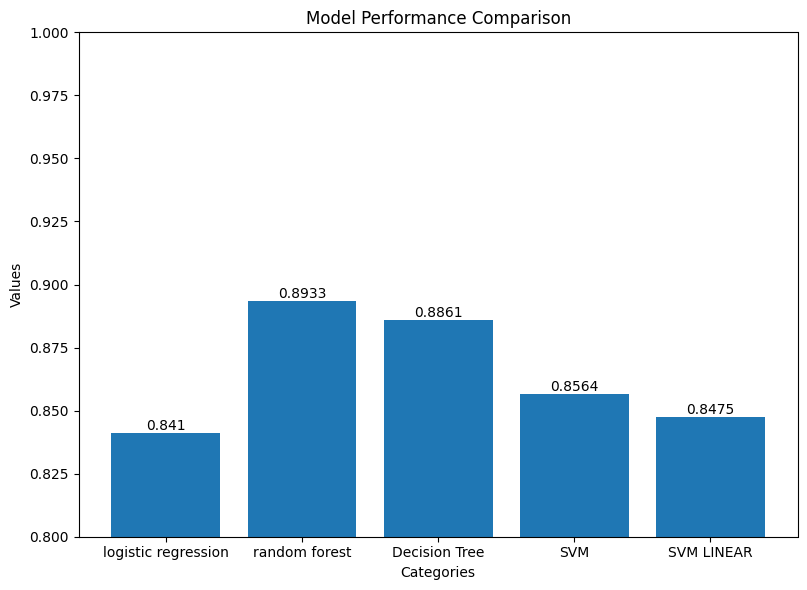

In [49]:
import matplotlib.pyplot as plt
datadf={"logistic regression":accuracy_LR_fs_HT,"random forest":accuracy_RF_fs_HT,"Decision Tree":accuracy_DT_fs_HT,"SVM":accuracy4,"SVM LINEAR":accuracy41}

categories = list(datadf.keys())
values1 = list(datadf.values())
values = [round(value, 4) for value in values1]
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values,)
# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.ylim([.80, 1])
plt.show()


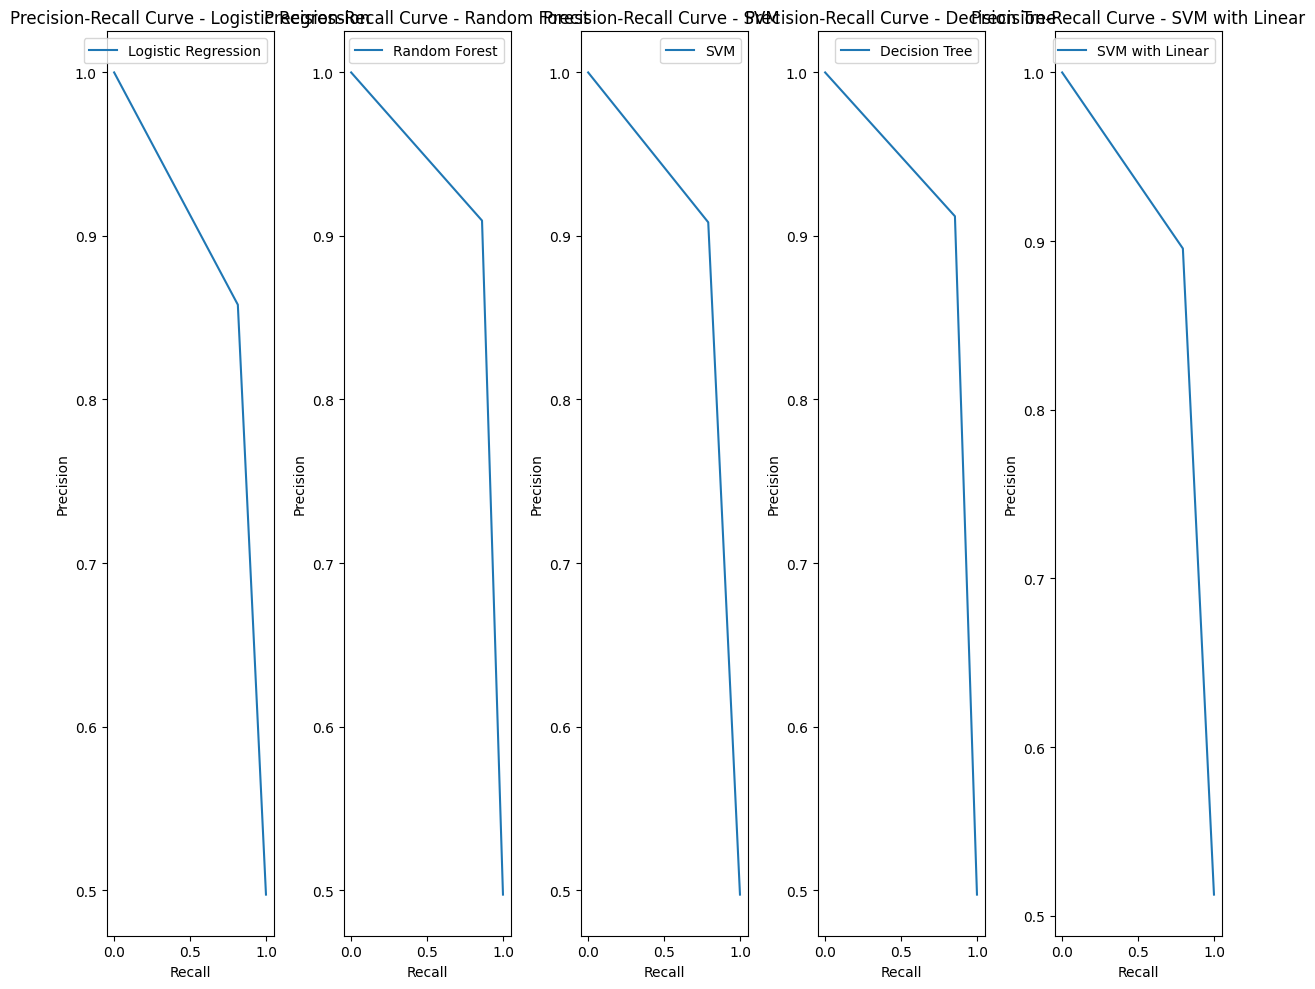

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision1, recall1, _ = precision_recall_curve(y1_test, Rf_pred)
precision2, recall2, _ = precision_recall_curve(y1_test, y_pred6)
precision3, recall3, _ = precision_recall_curve(y1_test, y_pred1)
precision4, recall4, _ = precision_recall_curve(y1_test, y_pred4)
precision5, recall5, _ = precision_recall_curve(ys_test, y_pred41)



plt.figure(figsize=(12, 10))

plt.subplot(1,5 , 1)
plt.plot(recall3, precision3, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()


plt.subplot(1, 5, 2)
plt.plot(recall1, precision1, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(recall4, precision4, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM ')
plt.legend()

plt.subplot(1, 5, 5)
plt.plot(recall5, precision5, label='SVM with Linear')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM with Linear')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(recall2, precision2, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()

plt.tight_layout()
plt.show()


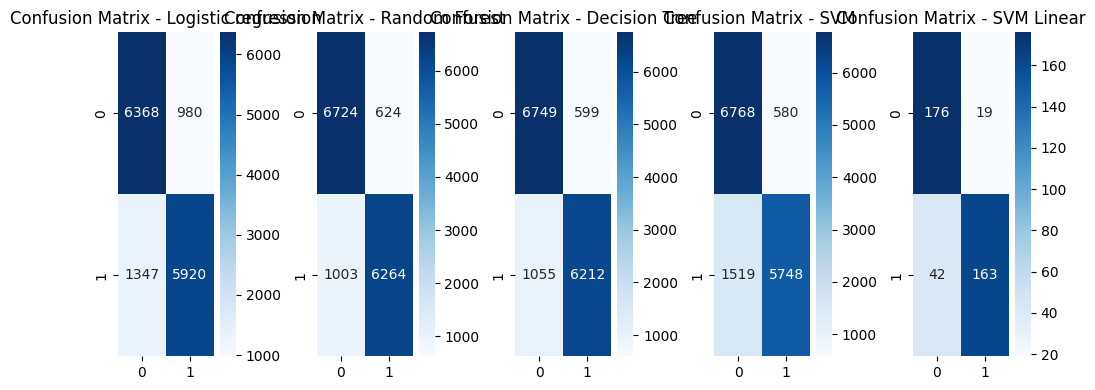

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred1 and y_pred2 are predictions from model1 and model2 respectively
conf_matrix1 = confusion_matrix(y1_test, Rf_pred)
conf_matrix2 = confusion_matrix(y1_test, y_pred6)
conf_matrix3 = confusion_matrix(y1_test, y_pred1)
conf_matrix4 = confusion_matrix(y1_test, y_pred4)
conf_matrix5 = confusion_matrix(ys_test, y_pred41)


plt.figure(figsize=(10, 4))

plt.subplot(1, 5, 1)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic regression')


plt.subplot(1, 5, 2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')


plt.subplot(1, 5, 3)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')


plt.subplot(1, 5, 4)
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM ')

plt.subplot(1, 5, 5)
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM Linear')

plt.tight_layout()
plt.show()


(80.0, 100.0)

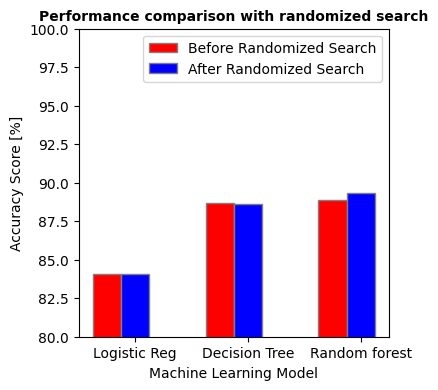

In [44]:
# Comparison Chart
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(4, 4))

# set height of bar
before_rs = [round(accuracy_Lr_fs*100,3), round(accuracy_Dt_fs*100,3), round(accuracy_Rf_fs*100,3)]
after_rs = [round(accuracy_LR_fs_HT*100,3), round(accuracy_DT_fs_HT*100,3), round(accuracy_RF_fs_HT*100,3)]

# Set position of bar on X axis
br1 = np.arange(len(before_rs))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, before_rs, color ='r', width = barWidth,
        edgecolor ='grey', label ='Before Randomized Search')
plt.bar(br2, after_rs, color ='b', width = barWidth,
        edgecolor ='grey', label ='After Randomized Search')

# Adding Xticks
plt.xlabel('Machine Learning Model', fontsize = 10)
plt.ylabel('Accuracy Score [%]', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(before_rs))],
        [ 'Logistic Reg', 'Decision Tree','Random forest'])
plt.title("Performance comparison with randomized search", fontweight ='bold', fontsize = 10)
plt.legend()
plt.ylim([80, 100])

In [45]:
Model = pd.DataFrame({
    #'Model': ['RF'],
    'Models': ["Random_forest","Decision Tree","Logistic_regression","SVM"],

    'Accuracy_Score_After_HT':[accuracy_RF_fs_HT,accuracy_DT_fs_HT,accuracy_LR_fs_HT,accuracy4]

})
Model

,Models,Accuracy_Score_After_HT
0,Random_forest,0.893260
1,Decision Tree,0.886144
2,Logistic_regression,0.840985
3,SVM,0.856380
